In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [2]:
import pandas as pd
df = pd.read_csv("/content/retail_sales_project.csv", parse_dates=['date'])
#Why: load into a DataFrame and parse date as datetime so you can time-series group, slice and extract year/month/week.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         333 non-null    datetime64[ns]
 1   store_id     333 non-null    object        
 2   product_id   333 non-null    object        
 3   category     333 non-null    object        
 4   units_sold   333 non-null    int64         
 5   unit_price   333 non-null    int64         
 6   total_sales  333 non-null    int64         
 7   promotion    333 non-null    int64         
 8   region       333 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 23.5+ KB


In [4]:
df.describe()

,date,units_sold,unit_price,total_sales,promotion
count,333,333.000000,333.000000,333.000000,333.000000
mean,2022-09-28 00:00:00,93.732733,151.000000,14514.495495,0.273273
min,2022-01-01 00:00:00,30.000000,5.000000,155.000000,0.000000
25%,2022-05-16 00:00:00,62.000000,5.000000,630.000000,0.000000
50%,2022-09-28 00:00:00,94.000000,49.000000,4067.000000,0.000000
75%,2023-02-10 00:00:00,127.000000,399.000000,26733.000000,1.000000
max,2023-06-25 00:00:00,159.000000,399.000000,63042.000000,1.000000
std,NaN,37.454921,176.545363,19275.296167,0.446311


In [5]:
df.isnull().sum()

,0
date,0
store_id,0
product_id,0
category,0
units_sold,0
unit_price,0
total_sales,0
promotion,0
region,0


data loaded correctly; no missing values (the generated dataset is clean). Date range: earliest to latest date present.

In [3]:
df.head()

,date,store_id,product_id,category,units_sold,unit_price,total_sales,promotion,region
0,2022-01-01,S001,P001,Electronics,97,399,38703,0,North
1,2022-01-01,S001,P002,Clothing,59,49,2891,0,North
2,2022-01-01,S001,P003,Groceries,63,5,315,0,North
3,2022-01-01,S002,P001,Electronics,107,399,42693,1,South
4,2022-01-01,S002,P002,Clothing,77,49,3773,0,South


In [ ]:
df['date'].min()

Timestamp('2022-01-01 00:00:00')

In [ ]:
df['date'].max()

Timestamp('2023-06-25 00:00:00')

**Create derived time columns**

In [ ]:
# Why: these columns make group-bys easier (monthly/weekly aggregates, seasonality, calendar filters).
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.to_period('M').astype(str)
df['week'] = df['date'].dt.isocalendar().week
df

,date,store_id,product_id,category,units_sold,unit_price,total_sales,promotion,region,year,month,month_name,week
0,2022-01-01,S001,P001,Electronics,97,399,38703,0,North,2022,1,2022-01,52
1,2022-01-01,S001,P002,Clothing,59,49,2891,0,North,2022,1,2022-01,52
2,2022-01-01,S001,P003,Groceries,63,5,315,0,North,2022,1,2022-01,52
3,2022-01-01,S002,P001,Electronics,107,399,42693,1,South,2022,1,2022-01,52
4,2022-01-01,S002,P002,Clothing,77,49,3773,0,South,2022,1,2022-01,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2023-06-25,S002,P002,Clothing,128,49,6272,0,South,2023,6,2023-06,25
329,2023-06-25,S002,P003,Groceries,116,5,580,0,South,2023,6,2023-06,25
330,2023-06-25,S003,P001,Electronics,32,399,12768,0,East,2023,6,2023-06,25
331,2023-06-25,S003,P002,Clothing,111,49,5439,0,East,2023,6,2023-06,25


**Aggregation: daily, monthly, product-level totals**

Why:

Daily totals give the revenue time series to plot trends.

Monthly totals smooth the series and are useful for forecasting and seasonality detection.

Product-level aggregates identify top-selling SKUs and categories.


In [ ]:
daily_sales = df.groupby('date')['total_sales'].sum().reset_index(name='daily_sales')

In [ ]:
daily_sales

,date,daily_sales
0,2022-01-01,111295
1,2022-01-16,147611
2,2022-01-31,160738
3,2022-02-15,140807
4,2022-03-02,169679
5,2022-03-17,164199
6,2022-04-01,176026
7,2022-04-16,119467
8,2022-05-01,115757
9,2022-05-16,118477


In [ ]:
monthly_sales = df.groupby('month_name')['total_sales'].sum().reset_index(name='monthly_sales')

In [ ]:
monthly_sales

,month_name,monthly_sales
0,2022-01,419644
1,2022-02,140807
2,2022-03,333878
3,2022-04,295493
4,2022-05,363148
5,2022-06,295331
6,2022-07,188767
7,2022-08,318585
8,2022-09,229707
9,2022-10,279508


In [ ]:
product_sales = df.groupby(['product_id','category'])[['total_sales','units_sold']].sum().sort_values('total_sales', ascending=False)

In [ ]:
product_sales

,,total_sales,units_sold
product_id,category,,
P001,Electronics,4297629,10771
P002,Clothing,482748,9852
P003,Groceries,52950,10590


**Outcome**: I displayed daily and monthly aggregated tables and the top products by revenue.

**Visualize overall revenue trend (daily)**

Why: first visual to answer "How is revenue trending over time?" — check for upward trends, dips or unusual spikes.

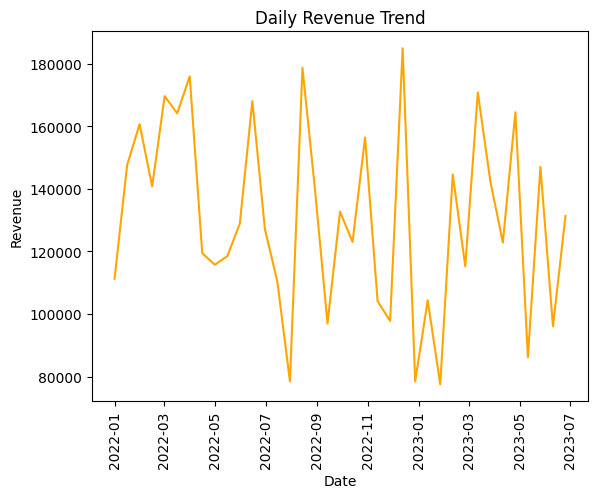

In [ ]:
plt.plot(daily_sales['date'], daily_sales['daily_sales'],color='orange')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()


**Outcome**:A clear time series plot (I generated and displayed it). Because the dataset uses 15-day frequency, the series looks stepwise — still shows seasonality/variation

**Visualize monthly revenue (bar)**

Why: monthly bars make seasonality and growth / decline across months obvious.

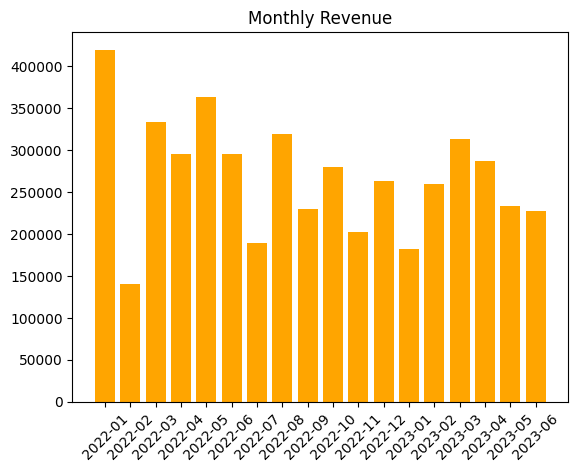

In [ ]:
plt.bar(monthly_sales['month_name'], monthly_sales['monthly_sales'],color='orange')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.show()

**Outcome**: The monthly revenue bar chart (displayed).

**Top products by revenue (horizontal bar)**

Why: identify best sellers quickly — essential for product prioritization and inventory decisions.

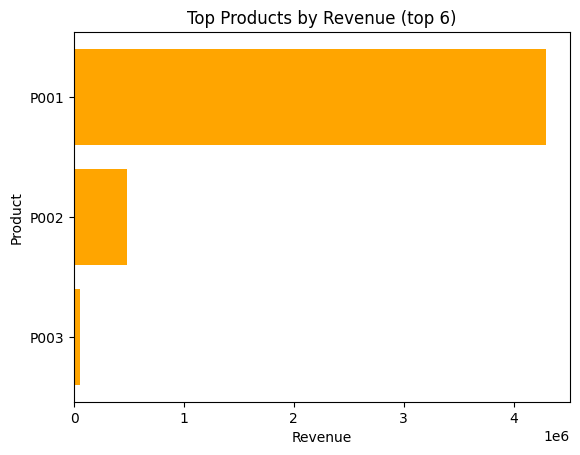

In [ ]:
top_products = product_sales.head(6).reset_index()
plt.barh(top_products['product_id'][::-1], top_products['total_sales'][::-1],color='orange')
plt.title('Top Products by Revenue (top 6)')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()

**Outcome**: Top 6 SKUs plotted showing which products contribute most to revenue.

**Promotion effect: compare promo vs no-promo**

Why: understand whether promotional rows have larger sales per-row. Note: the dataset's rows are (date,store,product) aggregates (not individual order lines), so boxplot shows distribution of these aggregated rows — still useful as a quick check.

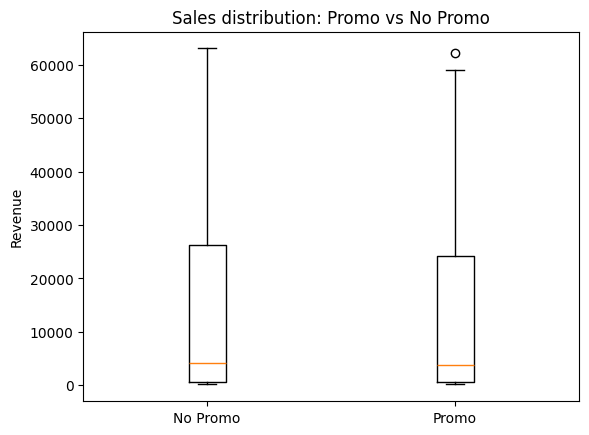

In [ ]:
plt.boxplot([df[df['promotion']==0]['total_sales'], df[df['promotion']==1]['total_sales']], tick_labels=['No Promo','Promo'])
plt.title('Sales distribution: Promo vs No Promo')
plt.ylabel('Revenue')
plt.show()

**Outcome**:Boxplot displayed.

**Smoothing with rolling mean (moving average)**

Why: moving average reduces noise and highlights trend. I used a small window because the dataset has 15-day frequency and limited points.

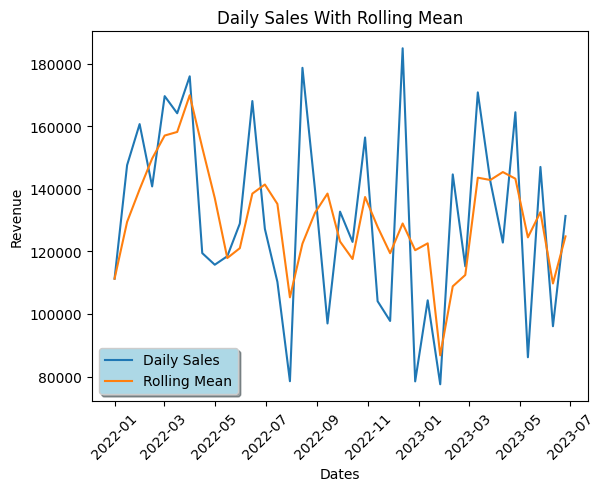

In [ ]:
daily_sales['ma_7'] = daily_sales['daily_sales'].rolling(window=3, min_periods=1).mean()
plt.plot(daily_sales['date'], daily_sales['daily_sales'], label='Daily Sales')
plt.plot(daily_sales['date'], daily_sales['ma_7'], label='Rolling Mean')
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.title('Daily Sales With Rolling Mean')
plt.xticks(rotation=45)
plt.legend(shadow=True,facecolor='lightblue',loc='lower left')
plt.show()

**Outcome**: Chart with rolling mean overlay (displayed).

**Simple naive forecasting example**

In [ ]:
last_month_sales_value = monthly_sales.iloc[-1]['monthly_sales']
naive_forecast = {"forecast_month": "next_month", "forecast_value": last_month_sales_value}

In [ ]:
last_month_sales_value

np.int64(227441)

In [ ]:
naive_forecast

{'forecast_month': 'next_month', 'forecast_value': np.int64(227441)}